In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# #이후 런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 36s (269 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and di

In [1]:
import warnings   
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["font.size"] = 12
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score

In [3]:
cd /content/drive/MyDrive/UBION_final_project/data

/content/drive/MyDrive/UBION_final_project/data


In [19]:
df = pd.read_csv('basic_final_df.csv')

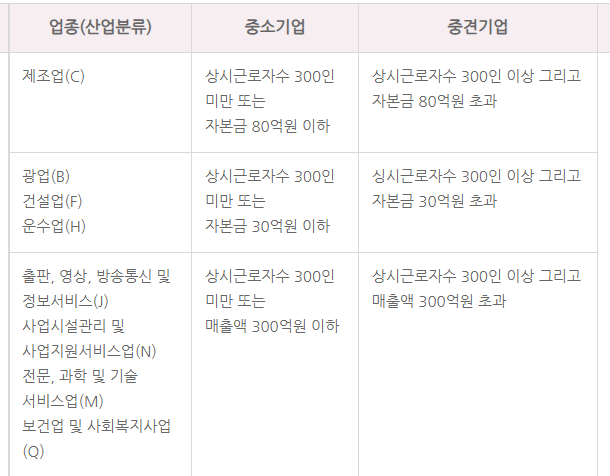

In [20]:
df[(df['종업원수'] >= 300) ]['차기부도여부'].value_counts()

0    6161
1      16
Name: 차기부도여부, dtype: int64

In [21]:
df[(df['종업원수']< 300) ]['차기부도여부'].value_counts()

0    12062
1      198
Name: 차기부도여부, dtype: int64

In [22]:
df['기업규모'] = 'Nan'

In [23]:
df.loc[df['종업원수']<=300, '기업규모'] = '중소기업'
df.loc[(df['종업원수'] > 300) , '기업규모'] = '중견&대기업'

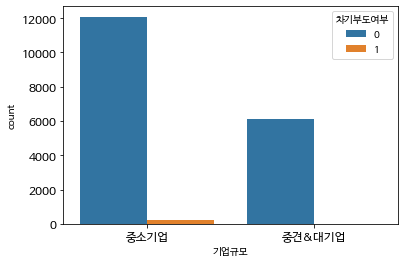

In [24]:
sns.countplot(x="기업규모", hue="차기부도여부", data=df)

In [25]:
print(df.loc[df['기업규모']=='중소기업', '회사명'].nunique())
print(df.loc[df['기업규모']=='중견&대기업', '회사명'].nunique())

1703
818


In [26]:
print(df.loc[(df['기업규모']=='중소기업')& (df['차기부도여부']==0), '회사명'].nunique())
print(df.loc[(df['기업규모']=='중소기업')& (df['차기부도여부']==1), '회사명'].nunique())

print(df.loc[(df['기업규모']=='중견&대기업')& (df['차기부도여부']==0), '회사명'].nunique())
print(df.loc[(df['기업규모']=='중견&대기업')& (df['차기부도여부']==1), '회사명'].nunique())

1670
198
815
16


In [ ]:
small_business_df = df[df['기업규모']=='중소기업']
small_business_df.drop(['기업규모'], axis= 1, inplace=True)
small_business_df.to_csv('small_business_df.csv', index=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
